# Speech Recognizer

## Visualizing Audio Signals - Reading from a File and Working on it

### Recording

When you have to read the audio signal from a file, then record it using a microphone, at first.

### Sampling

When recording with microphone, the signals are stored in a digitized form. But to work upon it, the machine needs them in the discrete numeric form. Hence, we should perform sampling at a certain frequency and convert the signal into the discrete numerical form. Choosing the high frequency for sampling implies that when humans listen to the signal, they feel it as a continuous audio signal.

### Example

The following example shows a stepwise approach to analyze an audio signal, using Python, which is stored in a file. The frequency of this audio signal is 44,100 HZ.

Import the necessary packages as shown here −

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [2]:
frequency_sampling, audio_signal = wavfile.read("audio.wav")

In [3]:
print("\nSignal shape:", audio_signal.shape)
print("Signal Datatype:", audio_signal.dtype)
print(
    "Signal duration:",
    round(audio_signal.shape[0] / float(frequency_sampling), 2),
    "seconds",
)


Signal shape: (230400, 2)
Signal Datatype: int16
Signal duration: 4.8 seconds


In [4]:
audio_signal = audio_signal / np.power(2, 15)

In [5]:
audio_signal = audio_signal[:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)

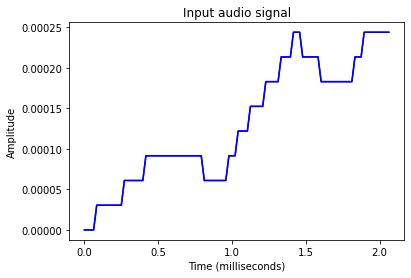

In [6]:
plt.plot(time_axis, audio_signal, color="blue")
plt.xlabel("Time (milliseconds)")
plt.ylabel("Amplitude")
plt.title("Input audio signal")
plt.show()

### Example

The following example shows, step-by-step, how to characterize the signal, using Python, which is stored in a file. Note that here we are using Fourier Transform mathematical tool to convert it into frequency domain.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [8]:
frequency_sampling, audio_signal = wavfile.read("bass.wav")

In [9]:
print("\nSignal shape:", audio_signal.shape)
print("Signal Datatype:", audio_signal.dtype)
print(
    "Signal duration:",
    round(audio_signal.shape[0] / float(frequency_sampling), 2),
    "seconds",
)


Signal shape: (1757184, 2)
Signal Datatype: int16
Signal duration: 36.61 seconds


In [10]:
audio_signal = audio_signal / np.power(2, 15)

In [11]:
length_signal = len(audio_signal)
half_length = np.ceil((length_signal + 1) / 2.0).astype(np.int)

C:\Users\hp\AppData\Local\Temp\ipykernel_22208\1573002114.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  half_length = np.ceil((length_signal + 1) / 2.0).astype(np.int)


In [12]:
signal_frequency = np.fft.fft(audio_signal)

In [13]:
signal_frequency = abs(signal_frequency[:half_length]) / length_signal
signal_frequency **= 2

In [14]:
len_fts = len(signal_frequency)

In [15]:
if length_signal % 2:
    signal_frequency[1:len_fts] *= 2
else:
    signal_frequency[1 : len_fts - 1] *= 2

In [16]:
signal_power = 10 * np.log10(signal_frequency)

C:\Users\hp\AppData\Local\Temp\ipykernel_22208\2629076837.py:1: RuntimeWarning: divide by zero encountered in log10
  signal_power = 10 * np.log10(signal_frequency)


In [17]:
x_axis = np.arange(0, len_fts, 1) * (frequency_sampling / length_signal) / 1000.0

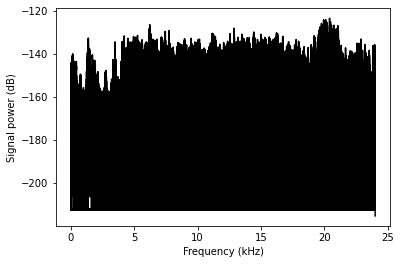

In [18]:
plt.figure()
plt.plot(x_axis, signal_power, color="black")
plt.xlabel("Frequency (kHz)")
plt.ylabel("Signal power (dB)")
plt.show()

## Generating Monotone Audio Signal

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

In [20]:
output_file = "audio_signal_generated.wav"

In [21]:
duration = 4  # in seconds
frequency_sampling = 44100  # in Hz
frequency_tone = 784
min_val = -4 * np.pi
max_val = 4 * np.pi

In [22]:
t = np.linspace(min_val, max_val, duration * frequency_sampling)
audio_signal = np.sin(2 * np.pi * frequency_tone * t)

In [23]:
write(output_file, frequency_sampling, audio_signal)

In [24]:
audio_signal = audio_signal[:100]
time_axis = 1000 * np.arange(0, len(audio_signal), 1) / float(frequency_sampling)

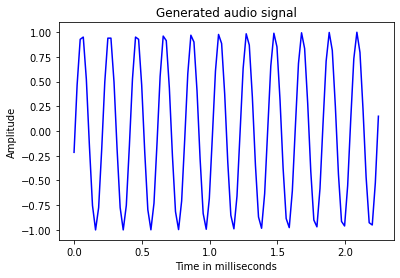

In [25]:
plt.plot(time_axis, audio_signal, color="blue")
plt.xlabel("Time in milliseconds")
plt.ylabel("Amplitude")
plt.title("Generated audio signal")
plt.show()